In [1]:
import pandas as pd
import numpy as np

In [2]:
# add "parse_dates=['date']" to change date column to datetime64
retail = pd.read_csv("../retail/retail_2016_2017.csv")
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [3]:
# single bracket returns series
retail.groupby("family")['sales'].sum().head()

family
AUTOMOTIVE       226139.0
BABY CARE          7903.0
BEAUTY           166189.0
BEVERAGES     105700279.0
BOOKS              6438.0
Name: sales, dtype: float64

In [4]:
# double brackets returns dataframe
retail.groupby("family")[["sales"]].sum().head()

,sales
family,
AUTOMOTIVE,226139.0
BABY CARE,7903.0
BEAUTY,166189.0
BEVERAGES,105700279.0
BOOKS,6438.0


In [5]:
# to do sorting with "sort_values", you must use the douvble brackets
retail.groupby("family")[['sales']].sum().sort_values('sales', ascending= True).head()

,sales
family,
BOOKS,6438.0
BABY CARE,7903.0
HOME APPLIANCES,13526.0
HARDWARE,41324.0
BEAUTY,166189.0


In [6]:
retail.groupby(["family","store_nbr"] #as_index=False
              )[['sales']].mean()#.sort_values('sales', ascending= True)

sales
family     store_nbr           
AUTOMOTIVE 1           4.263514
           2           6.618243
           3          11.469595
           4           4.332770
           5           6.194257
...                         ...
SEAFOOD    50         21.577647
           51         57.856333
           52          2.059926
           53          6.326318
           54          1.827703

[1782 rows x 1 columns]

In [7]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [8]:
small_retail = retail.drop(['id','date'],axis=1)
small_retail.head()

,store_nbr,family,sales,onpromotion
0,1,AUTOMOTIVE,0.0,0
1,1,BABY CARE,0.0,0
2,1,BEAUTY,0.0,0
3,1,BEVERAGES,0.0,0
4,1,BOOKS,0.0,0


In [9]:
small_retail.groupby(["store_nbr","family"]).agg('sum')

sales  onpromotion
store_nbr family                                               
1         AUTOMOTIVE                  2.524000e+03           14
          BABY CARE                   0.000000e+00            0
          BEAUTY                      1.776000e+03          190
          BEVERAGES                   1.238601e+06        13793
          BOOKS                       2.110000e+02            0
...                                            ...          ...
54        POULTRY                     3.553737e+04          909
          PREPARED FOODS              4.279200e+04          577
          PRODUCE                     3.786125e+05         6734
          SCHOOL AND OFFICE SUPPLIES  9.970000e+02          277
          SEAFOOD                     1.082000e+03          125

[1782 rows x 2 columns]

In [10]:
small_retail.groupby(["store_nbr","family"]).agg(['sum','mean'])

sales              onpromotion  \
                                               sum         mean         sum   
store_nbr family                                                              
1         AUTOMOTIVE                  2.524000e+03     4.263514          14   
          BABY CARE                   0.000000e+00     0.000000           0   
          BEAUTY                      1.776000e+03     3.000000         190   
          BEVERAGES                   1.238601e+06  2092.231419       13793   
          BOOKS                       2.110000e+02     0.356419           0   
...                                            ...          ...         ...   
54        POULTRY                     3.553737e+04    60.029334         909   
          PREPARED FOODS              4.279200e+04    72.283784         577   
          PRODUCE                     3.786125e+05   639.548107        6734   
          SCHOOL AND OFFICE SUPPLIES  9.970000e+02     1.684122         277   
          SEAFOOD                     1.082000e+03     1.827703         125   

                                                 
                                           mean  
store_nbr family                                 
1         AUTOMOTIVE                   0.023649  
          BABY CARE                    0.000000  
          BEAUTY                       0.320946  
          BEVERAGES                   23.298986  
          BOOKS                        0.000000  
...                                         ...  
54        POULTRY                      1.535473  
          PREPARED FOODS               0.974662  
          PRODUCE                     11.375000  
          SCHOOL AND OFFICE SUPPLIES   0.467905  
          SEAFOOD                      0.211149  

[1782 rows x 4 columns]

In [11]:
small_retail.groupby(["store_nbr","family"]).agg({'sales':['sum','mean'],'onpromotion':['min','max']})
#by passing in a dictionary we can get different data on each column

sales              onpromotion  \
                                               sum         mean         min   
store_nbr family                                                              
1         AUTOMOTIVE                  2.524000e+03     4.263514           0   
          BABY CARE                   0.000000e+00     0.000000           0   
          BEAUTY                      1.776000e+03     3.000000           0   
          BEVERAGES                   1.238601e+06  2092.231419           0   
          BOOKS                       2.110000e+02     0.356419           0   
...                                            ...          ...         ...   
54        POULTRY                     3.553737e+04    60.029334           0   
          PREPARED FOODS              4.279200e+04    72.283784           0   
          PRODUCE                     3.786125e+05   639.548107           0   
          SCHOOL AND OFFICE SUPPLIES  9.970000e+02     1.684122           0   
          SEAFOOD                     1.082000e+03     1.827703           0   

                                          
                                     max  
store_nbr family                          
1         AUTOMOTIVE                   1  
          BABY CARE                    0  
          BEAUTY                       2  
          BEVERAGES                   84  
          BOOKS                        0  
...                                   ..  
54        POULTRY                     11  
          PREPARED FOODS               7  
          PRODUCE                     83  
          SCHOOL AND OFFICE SUPPLIES   8  
          SEAFOOD                      2  

[1782 rows x 4 columns]

In [12]:
# to avoid multi-index columns, create column names in the .agg method
#Specify the new column name and assign it a tuple with the column you want to aggregate and 
#the aggregation you want to perform (put entire code in parenthesis)
(small_retail
.groupby(['family', 'store_nbr'])
.agg(sales_sum=('sales','sum'),
    sales_avg=('sales', 'mean'),
    on_promotion_max=('onpromotion','max')))


sales_sum  sales_avg  on_promotion_max
family     store_nbr                                           
AUTOMOTIVE 1           2524.000000   4.263514                 1
           2           3918.000000   6.618243                 1
           3           6790.000000  11.469595                 1
           4           2565.000000   4.332770                 1
           5           3667.000000   6.194257                 2
...                            ...        ...               ...
SEAFOOD    50         12773.966999  21.577647                 7
           51         34250.948976  57.856333                 7
           52          1219.475999   2.059926                 5
           53          3745.180001   6.326318                 5
           54          1082.000000   1.827703                 2

[1782 rows x 3 columns]

## Pivot Tables in Pandas


In [13]:
small_retail.pivot_table(index='family',
                        columns='store_nbr',
                        values='sales',
                        aggfunc='sum',
                        margins=True)

store_nbr,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,All
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,2.524000e+03,3.918000e+03,6.790000e+03,2.565000e+03,3.667000e+03,3.442000e+03,3.031000e+03,3.225000e+03,7.695000e+03,1.772000e+03,...,8.670000e+03,9.537000e+03,7.264000e+03,7.477000e+03,6.702000e+03,4.487000e+03,1.497000e+03,5.811000e+03,4.199000e+03,2.261390e+05
BABY CARE,0.000000e+00,8.400000e+01,6.720000e+02,2.400000e+01,2.150000e+02,1.200000e+01,4.800000e+01,1.420000e+02,2.280000e+02,1.790000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,1.980000e+02,7.903000e+03
BEAUTY,1.776000e+03,3.824000e+03,8.150000e+03,3.063000e+03,3.604000e+03,4.524000e+03,2.622000e+03,5.942000e+03,4.462000e+03,9.330000e+02,...,8.901000e+03,9.766000e+03,8.680000e+03,6.603000e+03,6.353000e+03,3.566000e+03,9.720000e+02,3.812000e+03,4.050000e+02,1.661890e+05
BEVERAGES,1.238601e+06,1.915519e+06,5.280120e+06,1.742495e+06,1.110429e+06,2.477150e+06,2.612147e+06,2.948874e+06,2.218853e+06,6.853110e+05,...,3.680161e+06,5.162704e+06,3.006995e+06,4.470550e+06,2.619648e+06,2.884739e+06,5.377960e+05,1.396928e+06,1.186768e+06,1.057003e+08
BOOKS,2.110000e+02,2.390000e+02,5.400000e+02,2.660000e+02,2.300000e+02,7.600000e+01,2.110000e+02,3.170000e+02,0.000000e+00,0.000000e+00,...,1.990000e+02,5.810000e+02,5.700000e+01,4.540000e+02,2.910000e+02,2.590000e+02,0.000000e+00,7.700000e+01,0.000000e+00,6.438000e+03
BREAD/BAKERY,2.239978e+05,4.101543e+05,8.056288e+05,2.642249e+05,2.099132e+05,3.653128e+05,4.655103e+05,5.341303e+05,3.390500e+05,6.388600e+04,...,5.772207e+05,7.349133e+05,5.090988e+05,7.779509e+05,3.837539e+05,5.349356e+05,9.752084e+04,3.133722e+05,1.313790e+05,1.709298e+07
CELEBRATION,9.072000e+03,8.342000e+03,2.935100e+04,5.931000e+03,1.523500e+04,8.932000e+03,1.169600e+04,1.425800e+04,9.131000e+03,2.373000e+03,...,1.317800e+04,1.711300e+04,1.284500e+04,2.130000e+04,2.191700e+04,9.150000e+03,1.343000e+03,6.110000e+03,2.892000e+03,4.449010e+05
CLEANING,3.906000e+05,5.791980e+05,1.268147e+06,5.227160e+05,5.386260e+05,7.606430e+05,6.625580e+05,7.736690e+05,1.078511e+06,4.420350e+05,...,1.417153e+06,1.454345e+06,1.315531e+06,1.187930e+06,9.924870e+05,8.677120e+05,2.014110e+05,6.839240e+05,6.882970e+05,3.812774e+07
DAIRY,4.309830e+05,5.794380e+05,1.427037e+06,5.328930e+05,3.265570e+05,6.644700e+05,8.766150e+05,9.682740e+05,5.477100e+05,1.861230e+05,...,9.889910e+05,1.429740e+06,8.233650e+05,1.493050e+06,7.143190e+05,9.688450e+05,1.405840e+05,3.682230e+05,1.511390e+05,2.842289e+07


In [14]:
small_retail.query('family in ["AUTOMOTIVE", "HARDWARE", "LAWN AND GARDEN"]').pivot_table(index='family',
                        columns='store_nbr',
                        values='sales',
                        aggfunc='sum',
                        margins=True)

store_nbr,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,All
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,2524.0,3918.0,6790.0,2565.0,3667.0,3442.0,3031.0,3225.0,7695.0,1772.0,...,8670.0,9537.0,7264.0,7477.0,6702.0,4487.0,1497.0,5811.0,4199.0,226139.0
HARDWARE,1056.0,904.0,2034.0,923.0,619.0,674.0,1550.0,1779.0,988.0,216.0,...,1088.0,1389.0,628.0,1270.0,792.0,894.0,395.0,1006.0,465.0,41324.0
LAWN AND GARDEN,7272.0,6452.0,23410.0,8430.0,3160.0,7547.0,17378.0,15540.0,3457.0,0.0,...,10676.0,14136.0,6381.0,14917.0,4483.0,17580.0,7706.0,5140.0,0.0,323517.0
All,10852.0,11274.0,32234.0,11918.0,7446.0,11663.0,21959.0,20544.0,12140.0,1988.0,...,20434.0,25062.0,14273.0,23664.0,11977.0,22961.0,9598.0,11957.0,4664.0,590980.0


In [15]:
# using query to select specific members of family
small_retail.query('family in ["AUTOMOTIVE", "HARDWARE", "LAWN AND GARDEN"]').pivot_table(index='family',
                        columns='store_nbr',
                        values='sales',
                        aggfunc='mean',
                        margins=True)

store_nbr,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,All
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,4.263514,6.618243,11.469595,4.332770,6.194257,5.814189,5.119932,5.447635,12.998311,2.993243,...,14.645270,16.109797,12.270270,12.630068,11.320946,7.579392,2.528716,9.815878,7.092905,7.073918
HARDWARE,1.783784,1.527027,3.435811,1.559122,1.045608,1.138514,2.618243,3.005068,1.668919,0.364865,...,1.837838,2.346284,1.060811,2.145270,1.337838,1.510135,0.667230,1.699324,0.785473,1.292668
LAWN AND GARDEN,12.283784,10.898649,39.543919,14.239865,5.337838,12.748311,29.354730,26.250000,5.839527,0.000000,...,18.033784,23.878378,10.778716,25.197635,7.572635,29.695946,13.016892,8.682432,0.000000,10.120026
All,6.110360,6.347973,18.149775,6.710586,4.192568,6.567005,12.364302,11.567568,6.835586,1.119369,...,11.505631,14.111486,8.036599,13.324324,6.743806,12.928491,5.404279,6.732545,2.626126,6.162204


In [16]:
#creating a heatmap based on current table(heatmap across entire table, 
#specify axis=1 and you get a heatmap per column, axis=0 and it would give heatmap per family)
small_retail.query('family in ["AUTOMOTIVE", "HARDWARE", "LAWN AND GARDEN"]').pivot_table(index='family',
                        columns='store_nbr',
                        values='sales',
                        aggfunc='mean',
                        margins=True).style.background_gradient(cmap="RdYlGn", axis=None)

store_nbr,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,All
family,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,4.263514,6.618243,11.469595,4.332770,6.194257,5.814189,5.119932,5.447635,12.998311,2.993243,7.410473,5.923986,5.910473,4.827703,3.165541,5.079392,8.559122,3.388514,7.839527,7.694257,10.224662,5.222973,2.148649,3.773649,2.947635,4.653716,6.900338,8.201014,6.613176,3.133446,9.131757,1.945946,9.307432,3.847973,5.358108,5.123311,4.548986,6.592905,9.646959,4.459459,6.209459,3.986486,5.896959,16.503378,16.569257,14.645270,16.109797,12.270270,12.630068,11.320946,7.579392,2.528716,9.815878,7.092905,7.073918
HARDWARE,1.783784,1.527027,3.435811,1.559122,1.045608,1.138514,2.618243,3.005068,1.668919,0.364865,0.687500,0.932432,0.498311,0.513514,1.020270,0.423986,1.003378,1.076014,1.459459,0.755068,0.908784,0.964527,0.378378,1.271959,0.969595,0.896959,2.479730,1.478041,1.148649,0.628378,0.545608,0.322635,0.493243,1.961149,0.368243,0.569257,1.706081,1.467905,1.966216,1.369932,1.140203,1.140203,0.555743,3.866554,1.298986,1.837838,2.346284,1.060811,2.145270,1.337838,1.510135,0.667230,1.699324,0.785473,1.292668
LAWN AND GARDEN,12.283784,10.898649,39.543919,14.239865,5.337838,12.748311,29.354730,26.250000,5.839527,0.000000,2.118243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.787162,0.000000,5.361486,2.520270,0.000000,1.966216,25.530405,17.064189,4.015203,23.631757,3.302365,2.847973,0.000000,1.814189,0.000000,0.000000,4.633446,0.000000,15.005068,17.851351,12.576014,11.234797,0.236486,16.261824,28.864865,2.760135,19.483108,31.261824,18.033784,23.878378,10.778716,25.197635,7.572635,29.695946,13.016892,8.682432,0.000000,10.120026
All,6.110360,6.347973,18.149775,6.710586,4.192568,6.567005,12.364302,11.567568,6.835586,1.119369,3.405405,2.285473,2.136261,1.780405,1.395270,1.834459,3.187500,2.417230,3.099662,4.603604,4.551239,2.062500,1.497748,10.192005,6.993806,3.188626,11.003941,4.327140,3.536599,1.253941,3.830518,0.756194,3.266892,3.480856,1.908784,6.899212,8.035473,6.878941,7.615991,2.021959,7.870495,11.330518,3.070946,13.284347,16.376689,11.505631,14.111486,8.036599,13.324324,6.743806,12.928491,5.404279,6.732545,2.626126,6.162204


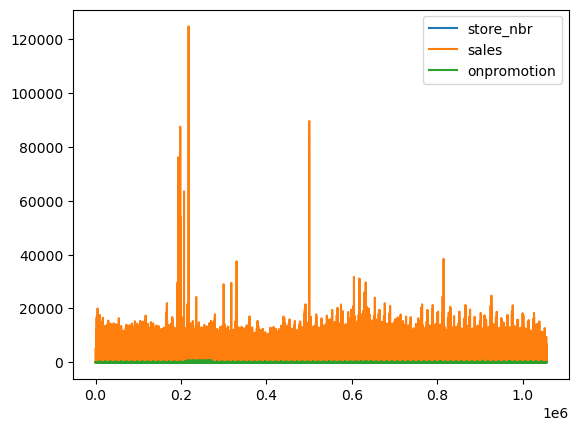

In [17]:
small_retail.plot();